# Permutation Test

In [47]:
import pandas as pd

In [48]:
data = pd.read_csv('../data/web_page_data.csv')
data

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67
5,Page B,0.85
6,Page A,2.11
7,Page B,2.46
8,Page A,1.32
9,Page B,1.49


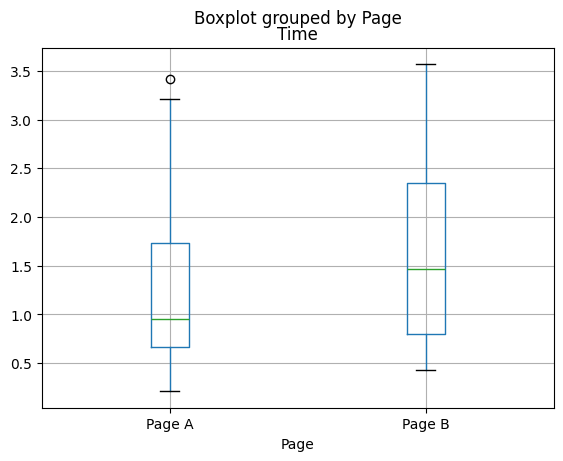

In [49]:
ax = data.boxplot(by="Page", column="Time")

In [50]:
mean_a = data[data.Page == "Page A"].Time.mean()
mean_b = data[data.Page == "Page B"].Time.mean()
diff_mean = mean_b - mean_a

count_a = data[data.Page == "Page A"].Page.count()
count_b = data[data.Page == "Page B"].Page.count()

data_count = data.Page.count()

print(f"Mean A: {mean_a}")
print(f"Mean B: {mean_b}")
print(f"Mean B - A: {mean_b - mean_a}")
print(f"Amount of data: {data.Page.count()}")
print(f"Amount of data for group A: {count_a}")
print(f"Amount of data for group B: {count_b}")

Mean A: 1.2633333333333332
Mean B: 1.62
Mean B - A: 0.3566666666666669
Amount of data: 36
Amount of data for group A: 21
Amount of data for group B: 15


0.13895


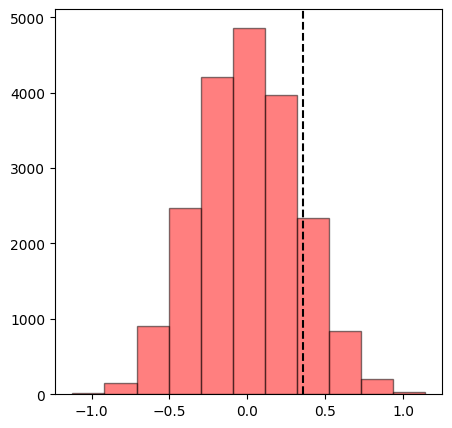

In [51]:
import random
import matplotlib.pyplot as plt
from scipy.stats import alpha
times = list(data.Time)
perm_diffs = []
count = 20000

for _ in range(count):
    random.shuffle(times)
    diff_sim = (sum(times[(count_a):(count_a+count_b)]) / count_b) - (sum(times[:(count_a)]) / count_a)
    perm_diffs.append(diff_sim)

perm_diff_greater = 0
for item in perm_diffs:
    if item >= diff_mean:
        perm_diff_greater += 1

result = perm_diff_greater / count
print(result)

fig, ax = plt.subplots(figsize=(5,5))
plt.hist(perm_diffs, bins=11, alpha=0.5, edgecolor="black", color="red")
plt.axvline(x=diff_mean, color='black', linestyle="--")
plt.show()

Very few of the 20.000 random shuffles produced a difference as large as the one we observed originally.

Becuase our our p value $0.13 > 0.05$, we fail to reject the null hypothesis. Which means, the improvement of the Group B is likely due to noise in the data.